# Announcements
- Homework 6 posted on D2L, covers finite difference methods + probability
- Homework 7 will be posted Nov 2, covers this + next week's material. Due 11/17, final homework!
- Outlook: statistical inference (this + next week), then intro to maschine learning


_This notebook is based on course material developed together with Phil Marshall and Adam Mantz._
# Bayes Theorem

Goals:
* Grasp how the mathematics of probability can be used to do statistical inference.
* Start working through real inference problems, with pencil, paper, and PGMs.

### References
(Don't buy these for this course, these are just pointers if you'd like to learn more.)
* **[Ivezic et al, "Statistics, Data Mining and Machine Learning in Astronomy"](http://www.astroml.org/)**, Ch. 5.1-5.3 
* **[MacKay, "Information Theory, Inference and Learning Algorithms"](http://www.inference.phy.cam.ac.uk/mackay/itprnn/book.html)**, Ch. 2.3 (free download)


### Sampling distributions and likelihoods

You've just been introduced to PGMs, which provide a visual representation of how data are generated.

* In inference problems, we have one (and only one) dataset to learn from

* The sampling distribution, $p(\mathrm{data}|\mathrm{params})$, plays a central role, since it quantifies how probable a given data set is given an assumed set of parameters.

* When evaluated as a function of the parameters, $p(\mathrm{data}|\mathrm{params})$ is known as the **likelihood function**

### Likelihood gotchas

* The sampling distribution is a PDF, normalized in data space

* The likelihood function is _not_ not a PDF for the parameters - it's not normalized in parameter space

* Either way, PGMs are still useful for visualizing the factorization of a joint probability into conditionally independent pieces

### PGMs in inference

<img src="graphics/pgms_all_pixels_input_sampled_inverse.png" width=60%>


* Double circled (or, sometimes, gray shaded) nodes denote variables that are _fixed by observation_: these nodes indicate the data.
* The PGM illustrates a particular factorization of the joint PDF of all variables.

* $\theta \sim$ ???
* For each $k$:
  * $\mu_k|\theta =$ ???
  * $N_k|mu_k \sim$ ???
  
$P(\theta) \prod_k P(\mu_k|\theta) P(N_k|\mu_k)$

### Other ingredients for principled inference

$p($data|params$)$ clearly has a role to play in inferring which parameter values are consistent with the data. What else do we need?

* $p($params$)$, the **prior distribution**
* $p($params|data$)$, the **posterior distribution**

### The prior distribution

$p($params$)$
* The *marginal* probability of a set of parameter values (integrated over possible data sets).
* Consequently, *independent of the measured data*.
* Interpretation: what we know about the model parameters *before* incorporating new knowledge in the form of the measured data.

### The posterior distribution

$p($params|data$)$
* The probability of a model *given* the measured data.
* Interpretation: what we know about the model parameters *after* incorporating new knowledge in the form of the measured data. In other words, the product of statistical inference.

## Bayes Theorem
The ingredients above are all related through the definition of conditional probability

$p(\mathrm{params}|\mathrm{data}) = \frac{p(\mathrm{data}|\mathrm{params})\,p(\mathrm{params})}{p(\mathrm{data})}$

The crux of this theorem, what makes it more than a trivial restatement, is that probability distributions are the appropriate mathematical tool for encoding knowledge about models and parameters.

* $p(\mathrm{params})$: prior - what we know before doing the experiment
* $p(\mathrm{data}|\mathrm{params})$: sampling distribution - probability of obtaining our data set
* $p(\mathrm{params}|\mathrm{data})$: posterior - what we know after doing the experiment ("the answer")
* $p(\mathrm{data})$: evidence - marginal probability of obtaining our data for any parameter values (more on this later)

All of these terms are implicitly also conditional on the _choice of model_.


### PGMs and Bayes

* There are two ways of factorizing the joint PDF for all variables:

$$p(\mathrm{params}, \mathrm{data}) = p(\mathrm{params}|\mathrm{data}) \, p(\mathrm{data})$$

$$= p(\mathrm{data}|\mathrm{params}) \, p(\mathrm{params})$$

* The second one is the factorization illustrated by the PGM - and it is proportional to the posterior PDF for the parameters given the data.

* PGMs help us _design inferences_, by illustrating the conditional dependencies between parameters and data



## Example: measuring the flux of a source

Say we want to measure the flux of a galaxy. In a given integration time, $T$, the number of counts, $N$, that we collect in our fancy CCD will be Poisson distributed

$N|\mu \sim \mathrm{Poisson}(\mu)$

where $\mu=FAT$ is the average number of counts we would expect in time $T$, the product of the integration time, the source flux ($F$, counts per unit time and area), and the collecting area of our telescope ($A$).

Presumably we know $A$ and $T$ well, so for convenience we can make $\mu$ rather than $F$ the free parameter of our model.

> Case 1: $N|\mu \sim \mathrm{Poisson}(\mu)$

<table>
    <tr>
        <td><img src="graphics/bayes_poissoneg_likelihood.png" width=100%></td>
    </tr>
</table>

> Case 2: $N|\mu \sim \mathrm{Poisson}(\mu)$, $\mu \sim \mathrm{some~prior}$

<table>
    <tr>
        <td><img src="graphics/bayes_poissoneg_pgm0.png" width=100%></td>
    </tr>
</table>

We'll talk more about how to choose a prior in a few minutes. For now, we'll make a common choice, the uniform distribution (for $\mu\geq0$ in this case).
* This is an **improper** distribution, i.e. one that can't technically be normalized. This doesn't necessarily matter, as long as the posterior distribution turns out to be proper.

> Case 2.a: $\mu \sim \mathrm{Uniform}(0,\infty)$

<table>
    <tr>
        <td><img src="graphics/bayes_poissoneg_prior.png" width=75%></td>
    </tr>
</table>

What about the evidence, $P(N)$?
* This is constant with respect to model parameters by definition, so we don't actually need to calculate it (although we could, by marginalizing the sampling distribution over $\mu$).
* That's because we know the posterior will be a probability distribution - as long as it's proper, the normalizing constant must be whatever makes it integrate to 1.

__So, we have everything we need to calculate $p(\mu|N)\propto P(N|\mu)p(\mu)$.__

Say we measure $N=5$. Now what?


Broadly speaking, we have 3 options for computing the posterior.
* Brute force over a grid in parameter space: straightforward, but expensive in many dimensions ($\rightarrow$ ProblemSet 7)
* Analytically: super-efficient, but only possible for certain forms of the likelihood and prior
* Monto Carlo: a more intelligent brute-force method

### Brute force

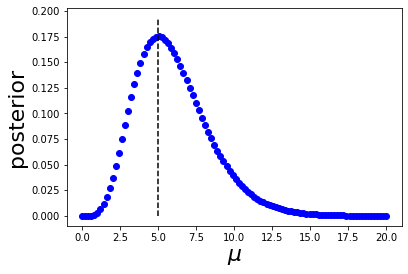

In [4]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
N = 5
mu = numpy.linspace(0.0, 20.0, 100) #grid of mu values
prior = 1.0                      # uniform (proportional to a constant)
like = scipy.stats.poisson.pmf(N, mu) # evaluate P(N|mu)   
post = like * prior
plt.rcParams['figure.figsize'] = (6.0,4.0) # plt == matplotlib.pyplot
plt.plot(mu, post, 'bo');
plt.plot([N]*2, [0.0, numpy.max(post)*1.1], 'k--');
plt.xlabel(r'$\mu$', fontsize=22);
plt.ylabel('posterior', fontsize=22);

### Analytical solution

If both the prior and likelihood are built from standard statistical distributions, we can sometimes take advantage of [conjugacy](https://en.wikipedia.org/wiki/Conjugate_prior).

**Conjugate distributions** are like eigenfunctions of Bayes Theorem. These are special cases for which the form of the posterior is the same as the prior, for a specific sampling distribution.

$$f(x|\theta)g(\theta|\phi) = g\left[\theta\left|\tilde{\phi}(x,\phi)\right.\right]$$

The Poisson distribution is conjugate to the Gamma distribution

$p(x|\alpha,\beta) = \frac{1}{\Gamma(\alpha)}\beta^\alpha x^{\alpha-1} e^{-\beta x}$ for $x\geq0$

Our uniform prior is a limiting case of Gamma (with $\beta\rightarrow0$), so we can take advantage of this.

If we take the prior $\mu \sim \mathrm{Gamma}(\alpha_0,\beta_0)$, the posterior will be $\mu|N \sim \mathrm{Gamma}(\alpha_0+N,\beta_0+1)$.

<table>
    <tr>
        <td><img src="graphics/bayes_poissoneg_pgm.png" width=100%></td>
    </tr>
</table>

Here we can demo how the posterior distribution depends on these prior **hyperparameters**, as well as the observed data.



In [19]:
from scipy.special import gamma as Gamma
def GammaPDF(x,a,b):
    return b**a * x**(a-1.0) * numpy.exp(-b*x) / Gamma(a)

def bayesDemo(alpha0, beta0, N):
    mu = numpy.linspace(0.0, numpy.max([10.0, N+5.0*numpy.sqrt(N)]), 100)
    prior = GammaPDF(mu, alpha0, beta0)
    like = scipy.stats.poisson.pmf(N,mu)
    postpar = (alpha0+N, beta0+1)
    post = GammaPDF(mu, postpar[0], postpar[1])
    priorLine, = plt.plot(mu,prior,'g')
    likeLine, = plt.plot(mu,like,'r')
    dataLine, = plt.plot([N]*2, [0.0, numpy.max(post)*1.1], 'k--')
    postLine, = plt.plot(mu,post,'b')
    plt.legend((priorLine, dataLine, likeLine, postLine), ('Prior', 'Data', 'Likelihood', 'Posterior'))
    plt.xlabel(r'$\mu$', fontsize=22)
    plt.ylabel('density', fontsize=22)
    return postpar


(6.0, 1.001)

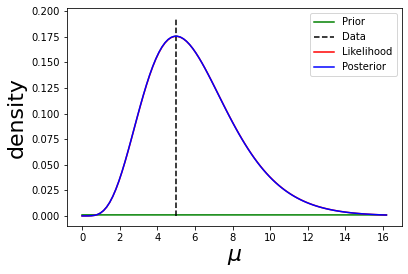

In [20]:
bayesDemo(alpha0=1.0, beta0=0.001, N=5)

### Bayes theorem as a model for accumulating information

$p(\mathrm{params}|\mathrm{data}) = \frac{p(\mathrm{data}|\mathrm{params})\,p(\mathrm{params})}{p(\mathrm{data})}$
* Within this formalism, today's posterior becomes tomorrow's prior seamlessly.

Assuming independent measurements, $p(\theta|x_1,x_2) \propto p(x_2|\theta)p(x_1|\theta)p(\theta) = p(x_2|\theta)p(\theta|x_1)$
* You can try this out with the demo above.

## Choosing a prior

The prior distribution encodes "what we know before doing the experiment at hand".
* Things are straightforward if we have prior knowledge from e.g. previous measurements or trustworthy simulations, and don't mind including it in our analysis.
* Otherwise, one generally assigns an "uninformative" prior.
* But note that **no distribution is truly devoid of information**.

### "Uninformative" priors

Common choices are
* Uniform
* Uniform in the log (i.e. in the order of magnitude)
* The [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior) for a given problem, which provides minimal Fisher information
* Priors with [maximal entropy](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution) for a given problem

The last 2 are not seen as often in astrophysics, but are worth knowing about.

* Again, **there is no genuinely uninformative option**. At best, we can make a minimally informative and defensible choice that doesn't significantly influence the result.
* If the data are so inadequate that out choice of prior really matters, our job as analysts is to clearly state/defend our assumptions and their influence on the results.

## Exercise: defend a prior

Given the choice between uniform, uniform-in-the-log ($\propto1/x$), or some other prior of your choosing on the following measurables, what do you think is most appropriate?

* The height of a classmate
* The mass of a star
* The mass of a _neutron_ star
* The distance to a supernova

## Summarizing posterior distributions

The posterior for model parameters may be "the answer" to an inference problem, but we often want a summary of the form $\theta = \theta_0 \pm \Delta\theta$ or $\theta_0{}_{-\Delta\theta_m}^{+\Delta\theta_p}$.
* This is interpreted as a statement about the *marginal* posterior of $\theta$, namely that $\theta$ is in the given **credible interval** with some (specified) probability.
* Note that credible intervals are technically different from the confidence intervals that appear in non-Bayesian statistics, but in practice the terms are often used interchangeably.

There are several conventions in use for how to come up with a best estimate and credible interval:
* Most-probable value and interval (most intuitive)
* Median and symmetric percentiles (easy)
* Mean and symmetric interval (huh?)

And some things you probably shouldn't do (valid only in certain limits)
* Mean and standard deviation
* Intervals from differences in log-likelihood (or log-posterior)

1 . Most-probable value and interval

<table>
    <tr>
        <td><img src="graphics/bayes_ci_maxp.png" width=100%></td>
    </tr>
</table>

2 . Median and symmetric percentiles

<table>
    <tr>
        <td><img src="graphics/bayes_ci_perc.png" width=100%></td>
    </tr>
</table>

3 . Mean and symmetric interval

<table>
    <tr>
        <td><img src="graphics/bayes_ci_mean.png" width=100%></td>
    </tr>
</table>

Differences between the conventions can be pronounced in the case of limits.

<table>
    <tr>
        <td><img src="graphics/bayes_ci_limit_maxp.png" width=100%></td>
        <td><img src="graphics/bayes_ci_limit_perc.png" width=100%></td>
        <td><img src="graphics/bayes_ci_limit_mean.png" width=100%></td>
    </tr>
    <tr>
        <td>most probable</td>
        <td>median/percentiles</td>
        <td>mean/symmetric</td>
    </tr>
</table>

Joint constraints (contours) for multiple parameters work similarly, although here only the maximum-probability approach is in wide use.

<table>
    <tr>
        <td><img src="graphics/straightline_2d_post.png" width=100%></td>
    </tr>
</table>

## Everything in this module is an inference

We've focussed on one task so far, but this framework applies any time we want to draw a conclusion from data.
* constraining model parameters
* choosing between model frameworks
* source detection
* interpolation and extrapolation
* ...


## Bonus numerical exercise: independent monte carlo

So far, we've used examples where the posterior is a standard distribution. In general this is not the case, and we resort to methods which produce **samples** from the posterior in order to estimate its density and/or integrate it (e.g. to marginalize some parameters). Sampling can be useful even in simple cases, especially for downstream propagation of uncertainties. This exercise will get you some practice working with `scipy`, and introduce the simplest possible sampling method.

For either the Poisson or Binomial examples above, make up some reasonable data and generate $10^4$ samples from the posterior distribution. Then do some post-processing:
1. For the Poisson experiment, convert the posterior for $\mu$ (average number of counts) into something akin to magnitude. Simplifying away things like the reference, integration time and collecting area, use the formula $m=1-2.5\log_{10}(\mu/50)$.
2. For the Binomial experiment, *predict* the number of relaxed clusters found in a hypothetical much larger sample (say 5000 clusters in total). That is, generate a Poisson sample from each of the samples of $\mu=5000f$ corresponding to the larger sample size.

Visualize the distributions for these derived parameters by plotting histograms of the samples.

## Bonus numerical exercise: confidence intervals

Write a function for determining the maximum-probability best fit and 1-dimensional confidence interval at a given level from an array of samples. (You can also write one that takes a posterior function as input instead of samples, but in the future we'll be using samples a lot.) Note that some kind of intelligent smoothing or kernel density estimation is generally needed to suppress numerical noise in histograms. Feel free to do the same for the percentile-based confidence intervals described above.

MegaBonus: Write a function for generating 2-dimensional confidence contours the same way. (Note that the `corner` package provides a nifty way to do this already.)